In [ ]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

In [1]:
# The starter code is short and simple, take a look!
from starter import *

import random

# Phase 1 - Create Inputs

In [2]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

In [3]:
# G = nx.empty_graph(N_SMALL)
# small(G)
# visualize(G)
# write_input(G, 'inputs/small.in')

# G = nx.empty_graph(N_MEDIUM)
# medium(G)
# visualize(G)
# write_input(G, 'inputs/medium.in')

# G = nx.empty_graph(N_LARGE)
# large(G)
# visualize(G)
# write_input(G, 'inputs/large.in')

# Phase 2 - Implement your Solver

In [4]:
from greedy_algorithm import *

In [5]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(5, 10)
    max_per_team = len(G.nodes) / k
    teams = [0 for _ in range(k)]
    for v in G.nodes:
        look_for_team = True
        while look_for_team:
            this_team = random.randint(1, k)
            if teams[this_team - 1] < max_per_team:
                G.nodes[v]['team'] = this_team
                teams[this_team - 1] += 1
                look_for_team = False

In [6]:
def current_solve(in_file):
    def current_solve_helper(G: nx.Graph):
        file_name = in_file[in_file.index("/") + 1:]
        file_name = file_name[:file_name.index("in")]
        instance = read_input(in_file)
        current_solution = read_output(instance, "outputs" + "/" + file_name + "out")
        for v in G.nodes:
            G.nodes[v]['team'] = current_solution.nodes[v]['team']
    return current_solve_helper

In [7]:
# Assign a team to v with G.nodes[v]['team'] = team_id
# Access the team of v with team_id = G.nodes[v]['team']

def solve(G: nx.Graph):
    
    # TODO: Try updating specific nodes, and seeing which changes to make based on homework 11 algorithm
    # TODO: Decrease the amount of nodes updated as time goes on
    # TODO: Do these steps for k-1, k, and k+1, pick the best

    k = optimize_k(G)
    G = max_k_cut_solve(k)(G)

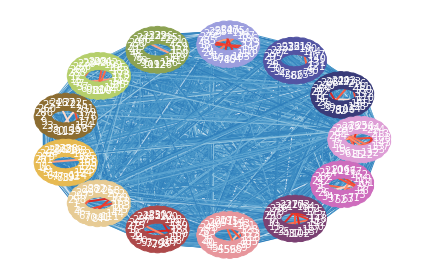

solve 163929.61221880637


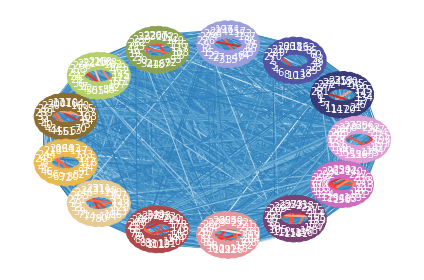

current_solve_helper 170341.82355708367


In [20]:
input = 'inputs/medium7.in'

solvers = [solve, current_solve(input)]

for solver in solvers:
    G = read_input(input)

    k = solver(G)
    validate_output(G)
    visualize(G)
    print(solver.__name__, score(G))

# G = read_input('self_inputs/medium.in')
# max_k_cut_solve(9)(G)
# visualize(G)
# print(score(G))


In [ ]:
# run(max_k_cut_solve(2), 'self_inputs/small.in', 'self_outputs/small.out')

In [191]:
# TODO: record the best solutions by only saving if the score is only than the previous best for that file
run_all(solve, 'inputs', 'outputs')

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 97730.24939607034
inputs/small232.in: cost 63733.31591025766
inputs/large116.in: cost 143009.6900202268
inputs/large59.in: cost 146982.61214938603
inputs/small150.in: cost 223755.66639451328
inputs/large147.in: cost 554796.0232292542
inputs/small101.in: cost 258034.78636752508
inputs/small197.in: cost 442422.2493960704
inputs/small206.in: cost 73069.31591025766
inputs/large240.in: cost 593730.0232292542
inputs/medium7.in: cost 767196.25610169
inputs/small257.in: cost 291672.4691841681
inputs/large180.in: cost 961810.6900202268
inputs/large211.in: cost 861111.6900202268
inputs/small135.in: cost 275460.9924928118
inputs/small68.in: cost 179169.14321523352
inputs/medium249.in: cost 86426.31591025766
inputs/large173.in: cost 75926.29471466366
inputs/small164.in: cost 215053.31591025766
inputs/medium218.in: cost 114619.24939607034
inputs/medium189.in: cost 101292.40967307265
inputs/small39.in: cost 64353.31591025766
inputs/large122.in: cost 179312.61214938603
inputs

In [ ]:
tar('outputs', True)